# import pandamonium's Data Science Team Project


## Background:
This notebook will explore the data from our client, a medical research company. We have been asked to improve the early detection of breast cancer using machine learning.  

The goal of this project is to train a machine learning model which predicts whether the cancer is **benign or malignant**.

## Contents:
1. **Loading and Pre-Processing the Data**
  
    1.1 Importing Relevant Libraries
  
    1.2 Loading and Exploring the Raw Dataframe
  
    1.3 Pre-Processing the Data


2. **Data Exploration**

    2.1 Missing values
    
    2.2 Duplicate Rows
    
    2.3 Data Split between Diagnoses
    
    2.4 Outliers


3. **Data Visualisation**

    3.1 Graph Types
    
    3.2 Correlations
    
    3.3 Scatter Plots
        
    
4. **Preparing Data for Machine Learning Algorithms**

    4.1 Feature Scaling
    
    4.2 Splitting Data into 'Training' and 'Testing' Groups and Determining the Threshold
    
    4.3 **Feature selection ??????????**
    
    
5. **Machine Learning Models**

    5.1 Logistic Regression
  
    5.2 Decision Tree Algorithm
  
    5.3 Random Forest Classification

    5.4 Nearest Neighbour

    5.5 Support Vector Machines

    5.6 Kernel SVM

    5.7 Naive Bayes


6. **Evaluation**

## 1. Loading and Pre-Processing the Data
### 1.1 Importing Relevant Libraries:

In [1]:
#### Core Python Libraries ####
import pandas as pd
import numpy as np

import pickle
import os
from IPython.display import Math
from itertools import product

##### Data Visualisation Libraries ####
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Machine Learning Models ####
#Standard Tools:
from sklearn.datasets import load_iris
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, roc_curve, auc
import scipy.optimize as op 

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

#Logistic Regression:
from sklearn.linear_model import LogisticRegression

#Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier

#Random Forest Classifier:
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes Classifier:
from sklearn.naive_bayes import GaussianNB

# Kernel SVM:
from sklearn.svm import SVC

### 1.3 Loading and Exploring the Raw Dataframe

In [3]:
df_raw = pd.read_csv("data.csv", encoding = "UTF-8", index_col=[0]) #gets rid of index column

#### Question: How many rows of data are there? How many columns/features are there?

In [4]:
print(df_raw)

         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          s

In [5]:
df_raw.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [7]:
df_raw.shape

(569, 32)

#### Summary: 

* There are 569 rows of data and 32 columns/features. 
* Output is stored in the 'diagnosis' column, marked as 'M' for malignant or 'B' for benign.
* All columns are data type float64 with the exception of 'diagnosis' which is an object.
* The column 'Unnamed: 32' contains 0 non-null values and appears to be an empty column.

### 1.3 Pre-Processing the Data
There is a column which only has null values (Unnamed: 32), we should get rid of this now as it will interfere with our models and calculations later on

In [8]:
df_clean = df_raw.drop(['Unnamed: 32'], axis=1)

#### Checking the column has been removed:

In [9]:
df_clean.shape

(569, 31)

#### Dealing with Categorical Data:

We have a categorical attribute (diagnosis), most models cannot handle these (object) values -- so we need to transform them if we want to include them in our model before modelling.

We will be using One-hot Encoding which converts each categorical value into a new column and assigns a 1 or 0 (True/False) value to each row
#### Most models cannot use categorical/object values (i.e. the 'diagnosis' column)- these must be transformed to a different data type using one-hot encoding

In [28]:
one_hot_df = pd.get_dummies(df_clean, drop_first=True) #B = 0, M = 1

In [29]:
one_hot_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## 2. Data Exploration

### 2.1 Missing values 

#### Are there any null/missing values in the columns?

In [12]:
df_clean.isnull().sum()
df_clean.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no missing/null values in the columns

### 2.2 Duplicate Rows
#### Are there any duplicate rows?

In [13]:
df_raw.drop_duplicates()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


Since all 569 rows of data were still returned after running 'drop duplicates', that means that there are no duplicate rows of data.

### 2.3 Data Split between Diagnoses
#### Question: What is the split between data marked as malignant ('M') and benign ('B')?

In [11]:
malignant_count = len(df_raw[df_raw['diagnosis'] == 'M'])
benign_count = len(df_raw[df_raw['diagnosis'] == 'B'])

print('The number of malignant cases is ' + str(malignant_count) + '. The number of benign cases is ' + str(benign_count))

The number of malignant cases is 212. The number of benign cases is 357


Text(0, 0.5, 'Frequency')

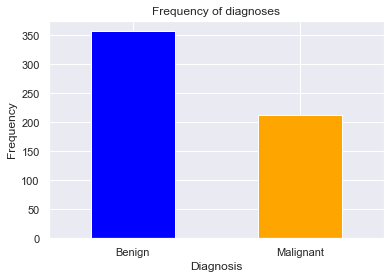

In [17]:
#Plotting frequency of benign and malignant tumours:
Labels = ['Benign', 'Malignant']
diagnoses = pd.value_counts(df_clean['diagnosis'], sort = True)
diagnoses.plot(kind = 'bar', rot=0, color=["blue", "orange"])
plt.title("Frequency of diagnoses")
plt.xticks(range(2), Labels)
plt.xlabel("Diagnosis")
plt.ylabel("Frequency")

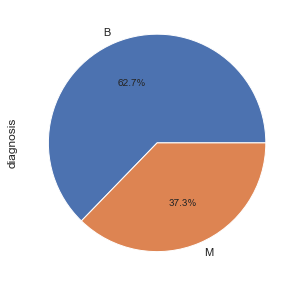

In [30]:
pie_plot = df_clean['diagnosis'].value_counts().plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%')

#### Summary so far:

* There are 569 records, each with 11 columns.
* Diagnosis is the only categorical variable (containing objects), all other variables are continuous.
* There are no missing values in any of the attributes
* Class distribution is: **357 benign and 212 malignant**
* 37.3% of the data is classified as malignant, 62.7% of the data is classified as benign; there is a slight skew to the data.
* This means our chosen model has to beat 62.7% to be better at classifying than random chance

### 2.4 Outliers

We can check for outliers using box plots and seeing if there are any values above 1.5*interquartile range (IQR).

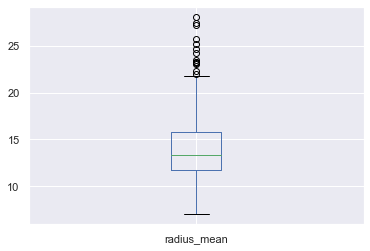

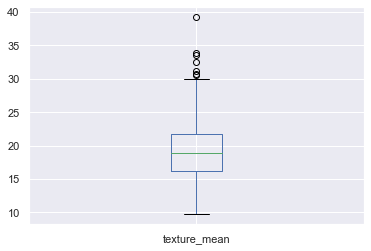

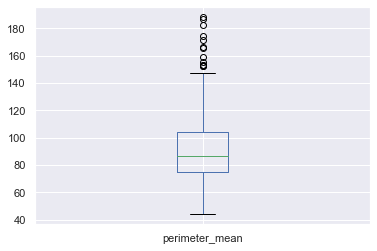

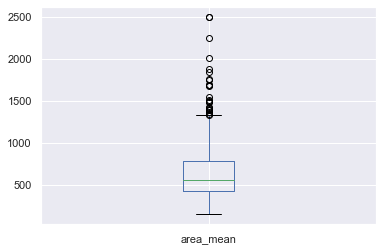

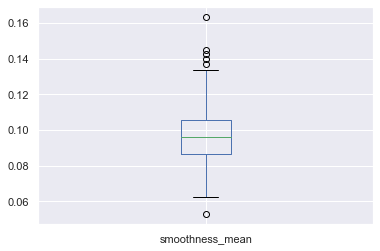

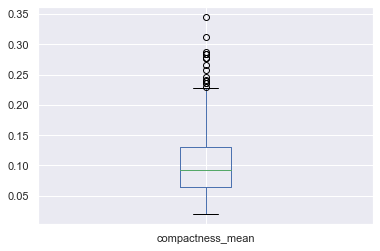

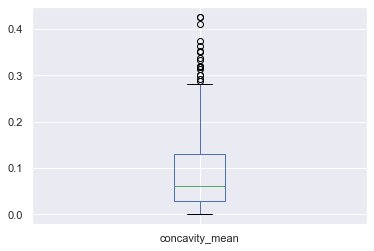

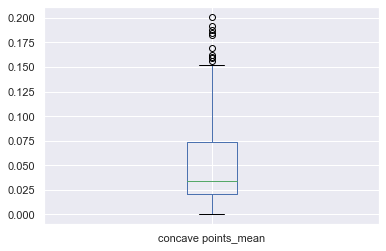

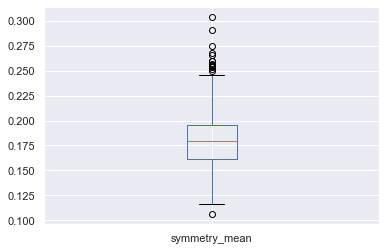

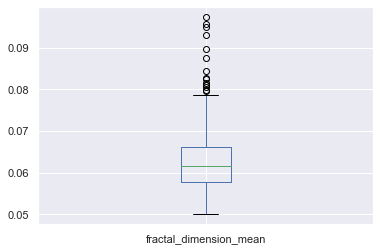

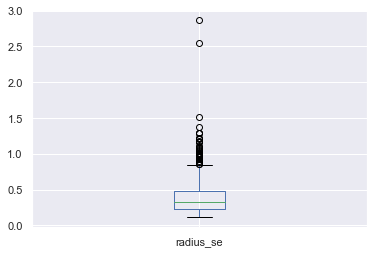

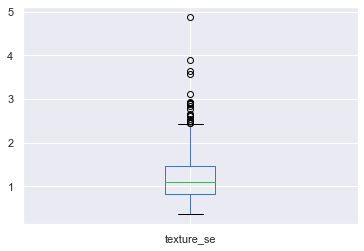

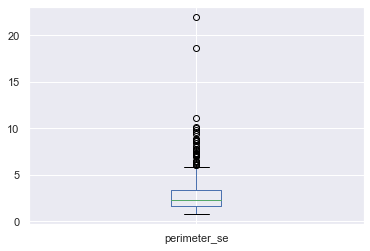

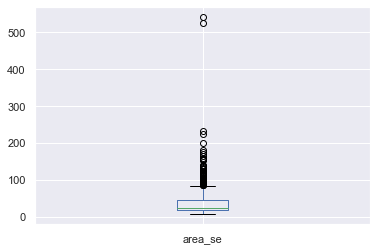

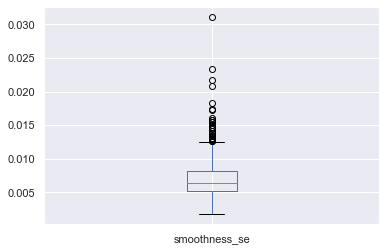

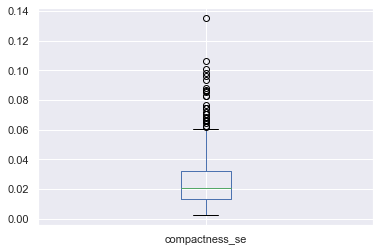

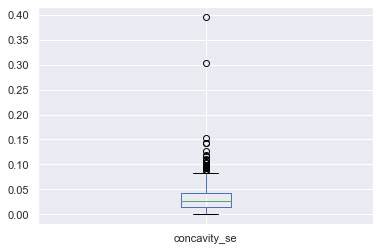

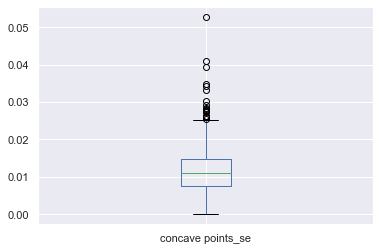

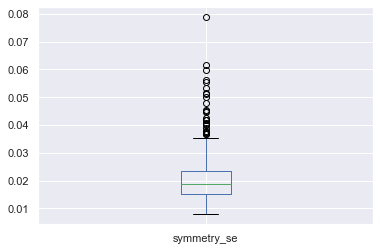

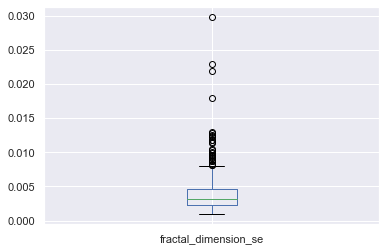

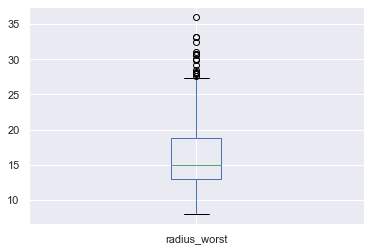

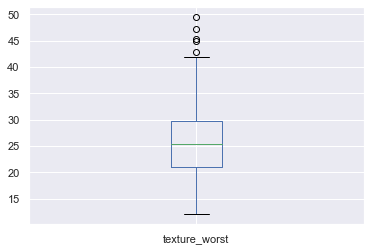

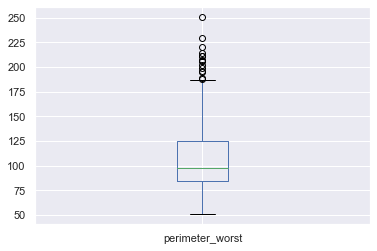

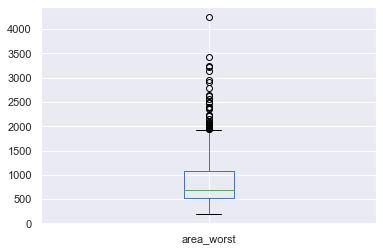

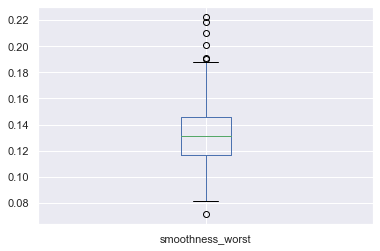

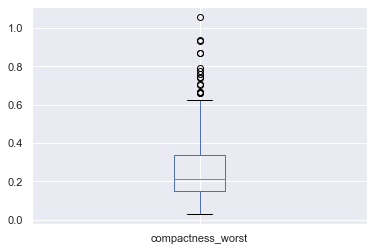

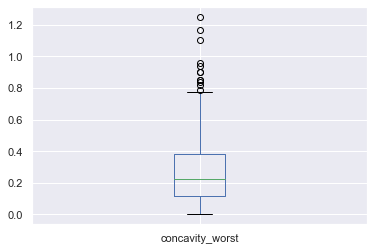

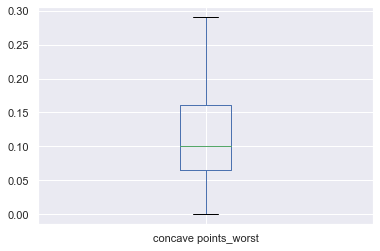

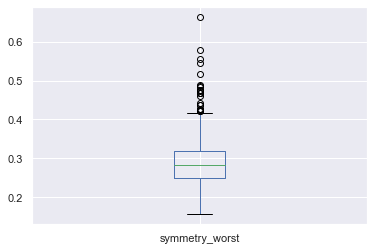

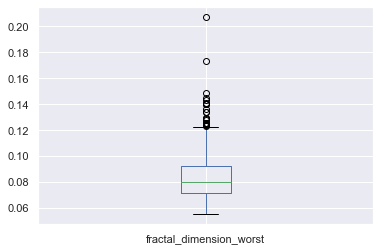

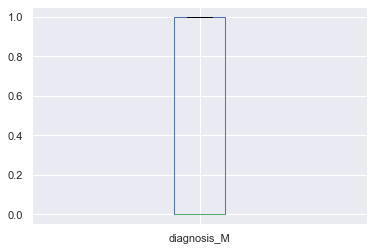

In [31]:
for column in one_hot_df:
    plt.figure()
    one_hot_df.boxplot([column])

In [32]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0, random_state = 2)
model.fit(one_hot_df)

one_hot_df['anomaly']=model.predict(one_hot_df)


anom_count = len(one_hot_df[one_hot_df['anomaly'] == -1])
print('The number of outliers is ' + str(anom_count))

The number of outliers is 57


/Users/bukunmio/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


From the exploration of the outliers of the data, whilst there are some points classed as outliers, from the visualisation none of these are so far away from the majority of the data so as to be clearly identifiable as erroneous: all data will be kept.

In [33]:
#Dropping the anomaly column
one_hot_df = one_hot_df.drop(['anomaly'], axis=1)

#### Visualising some of the mean values:

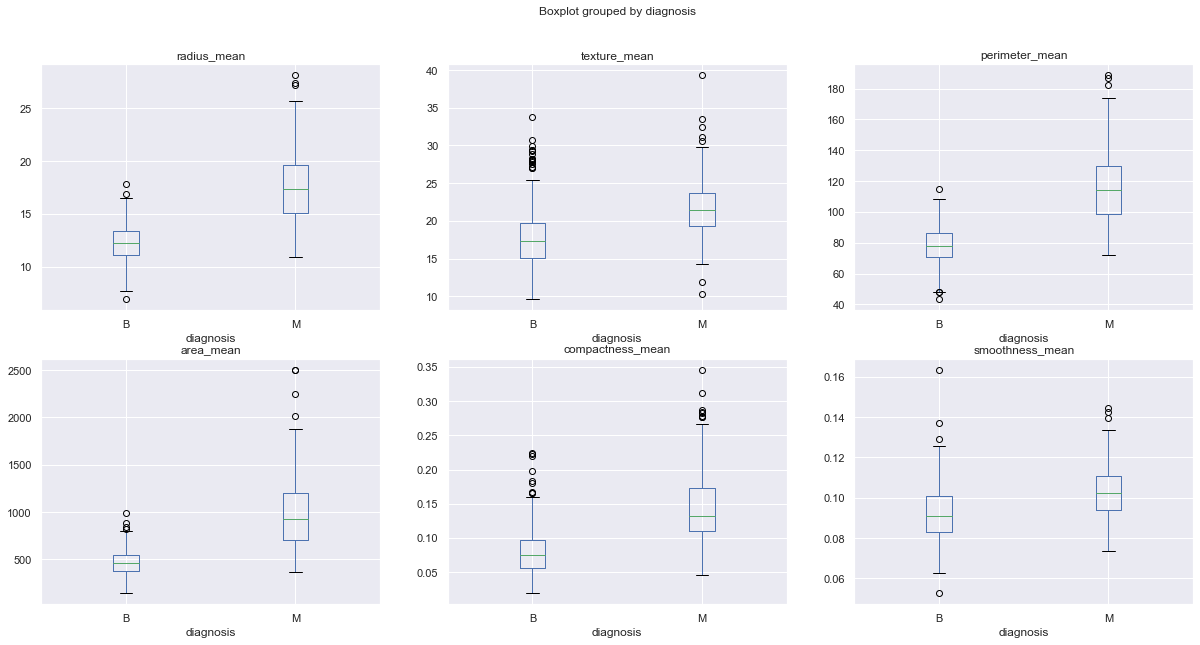

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
df_clean.boxplot('radius_mean','diagnosis', ax=axs[0, 0], patch_artist=False)
df_clean.boxplot('texture_mean','diagnosis', ax=axs[0, 1])
df_clean.boxplot('perimeter_mean','diagnosis', ax=axs[0, 2])
df_clean.boxplot('area_mean','diagnosis', ax=axs[1, 0])
df_clean.boxplot('compactness_mean','diagnosis', ax=axs[1, 1])
df_clean.boxplot('smoothness_mean','diagnosis', ax=axs[1, 2])

#### Summary:
* There are a few variables which have have a number of outlier points.
* If the proportion of outliers is less than 5%, it seems they won't have a great effect on the mean, so data will not require further cleaning.
* By comparing the different attributes' boxplots against one another, we can see that the median values for Malignant cases are much higher than the same attributes in Benign cases.

## 3. Data Visualisation

We will be using the visualisation of the data in order to observe which features are most helpful for us to use in order to predict whether the cancer is benign or malignant. 

We will also be using it to see if we can pick out trends that can help us select an appropriate model as well as select our hyperparameters.

### 3.1 Graph Types
**Histogram:**
A histogram represents the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable.

**Box Plot:**
The box plot (a.k.a. box and whisker diagram) is a standardized way to display the distribution of data based on the five following summary statistics: minimum, first quartile, median, third quartile, and maximum. It is a very useful plot to very quickly visualise the distribution of a continuous variable across multiple categories.

**Correlation Matrix:**
A correlation matrix is a table showing Pearson correlation coefficients between selected variables. Each cell in the table shows the Pearson correlation between two variables (or more). A clustermap is a correlation matrix to which hierarchical clustering has been applied.

**Scatter Plot:**
A scatterplot helps identify a linear relationship between two variables. A scatterplot can also be called a scattergram or a scatter diagram. It is another way to illustrate correlation between two variables.

### 3.2 Correlations

In [ ]:
plt.figure(figsize = (15,10))
correlation_matrix = df_raw.corr()
sns.heatmap(data = correlation_matrix, annot = True)

#### We will separate the different variables into mean, SE (standard error) and worst:

In [20]:
features_mean= list(df_clean.columns[1:11])
features_se= list(df_clean.columns[11:20])
features_worst=list(df_clean.columns[21:31])

#### Mean Values:

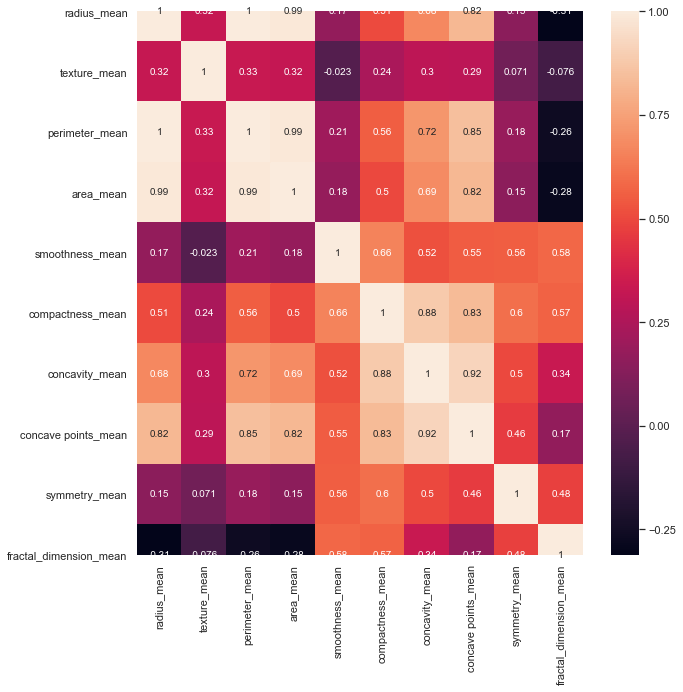

In [22]:
corr = df_clean[features_mean].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

#### Standard Errors:

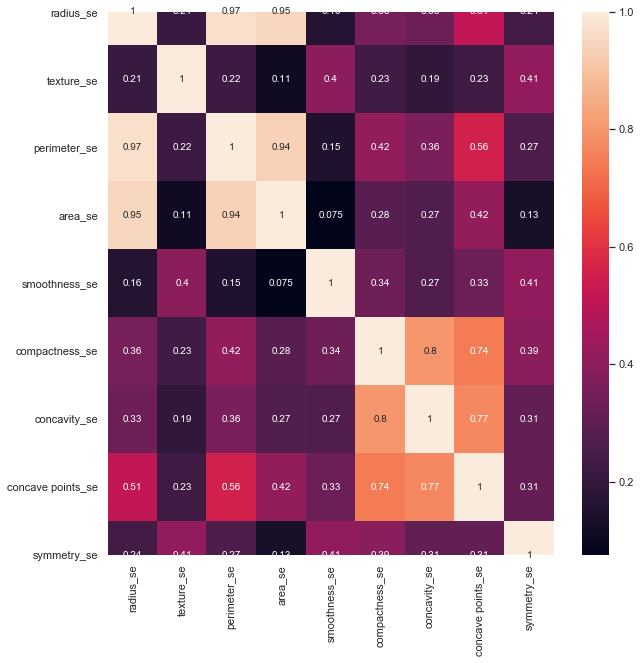

In [25]:
corr = df_clean[features_se].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

#### Worst:

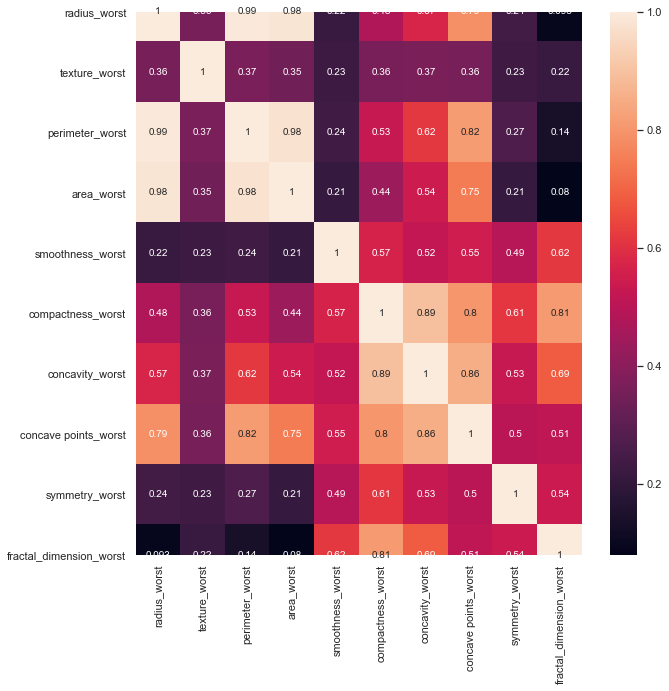

In [24]:
corr = df_clean[features_worst].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

### 3.3 Scatter Plots

In [ ]:
sns.pairplot(one_hot_df, hue = 'diagnosis_M')

A matrix of the visual representation of the relationship between the 5 most highly correlated mean variables: 
1. radius_mean 
2. parameter_mean
3. area_mean 
4. compactness_mean 
5. concavity_mean

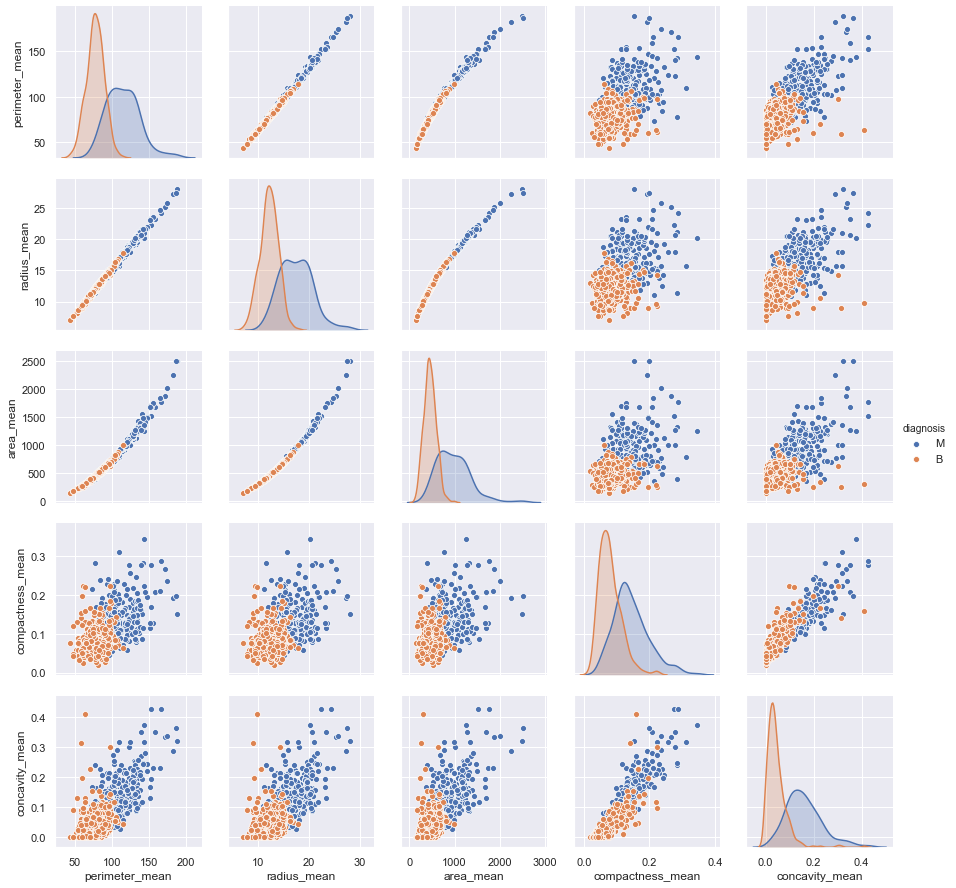

In [26]:
sns.pairplot(df_clean, hue='diagnosis', vars=["perimeter_mean", "radius_mean", "area_mean", "compactness_mean", "concavity_mean"])

#### Observations:
##### Heat Map
Some columns are shown in the correlation visualisation to be highly correlated to each other and so do not add any additional information:
#### The features can be grouped into: 

1. Size, e.g. perimeter, radius, area 
2. Shape, e.g. compactness, concavity 

The features within these groups also happen to be highly correlated
* There are many highly correlated features among the mean values. 
* There are also some highly negatively correlated features (particularly fractal_dimension_mean with radius_mean, perimeter_mean and area_mean).
 - Looking up fractal dimension it seems that fractal dimension is used to assess the degree of abnormality and aggressiveness of breast cancer.
* We will drop **perimeter_mean** and **area_mean** (0.99 and 1 correlation metrics) and keep ***radius_mean***
* We will drop **perimeter_worst** and **area_worst** (0.98 and 0.99 correlation metrics) and keep ***radius_worst***

##### Scatter Plots

From the scatter plots above it is clear that we will be able to distinguish between the 2 types of diagnosis:

* Malignant cases are in the upper, right quadrant
* Benign cases are in the lower, left quadrant

So the cases with higher values for these variables will most likely be malignant, and vice versa

In [35]:
##radius_mean is highly correlated to perimeter_mean and area_mean (0.99 and 1 correlation metrics)- keep radius_mean

one_hot_df = one_hot_df.drop(['perimeter_mean'], axis = 1)
one_hot_df = one_hot_df.drop(['area_mean'], axis = 1)

##radius_worst is highly correlated to perimeter_worst & area_worst (0.98 and 0.99 correlation metrics)- keep radius_worst
one_hot_df = one_hot_df.drop(['perimeter_worst'], axis = 1)
one_hot_df = one_hot_df.drop(['area_worst'], axis = 1)

## 4. Preparing Data for Machine Learning Algorithms

We are going to test several different models and try to optimise them, we will then evaluate them and choose the best model for predicting the tumours

### 4.1 Feature Scaling

We scale our features in order to prevent models from ignoring smaller values in favour of larger ones.

Consequently, all features will have a mean of 0 and a standard deviation of 1.

We are performing a Z-score standardisation as with further research many of the features follow a Gaussian distribution (which will help with the modelling later on as many assume Gaussian distribution). [(Link)](https://docs.google.com/document/d/1x0A1nUz1WWtMCZb5oVzF0SVMY7a_58KQulqQVT8LaVA/edit)

In [36]:
# Initialising the target and features
target = one_hot_df['diagnosis_M']
one_hot_df_in = one_hot_df.drop('diagnosis_M', axis=1)

# Scaling the features
std_features = (one_hot_df_in.apply(lambda x : (x - np.mean(x)) / np.std(x)))
std_features.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,1.886690,-1.359293,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,1.805927,-0.369203,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,1.511870,-0.023974,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,-0.281464,0.133984,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,1.298575,-1.466770,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 4.2 Splitting Data into  'Training' and 'Testing' Groups and Determining the Threshold

Data will be split to maximise the amount of data the model can be trained on; there is suffient data (569 rows) so that the proportion of test data does not need to be larger than 20%. 

There is some skew to the data as identified above but this is not significant enough to warrant artifical creation of further malignant training data.

The threshold is incredibly important when trying to predict a medical diagnosis:
* Our machine learning models will determine whether a tumour is benign or malignant.
* The threshold determines the probability at which we diagnose a tumour as malignant.
* False positives can be tolerated more than false negatives. However false positives should be brought to a minimum as much as possible as a false positive can lead to a patient having to undergo an unnecessary and intrusive biopsy.
* So to balance these risk factors, we have chosen the threshold to be 45%, so as to reduce the probability of a false negative, but not to the extent that there are too many false positives.

In [37]:
# Splitting into training and testing data
X = one_hot_df_in.values
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 42)

# Setting the threshold
threshold = 0.45

# 5. Machine Learning Models

### Accuracy v Precision:
* When it comes time to evaluate these models we have to take into consideration their accuracy and precision

### Optimisation:
Different types of optimisation in Machine Learning [(Link)](https://machinelearningmastery.com/what-is-bayesian-optimization/):
1. **Algorithm Training**. Optimization of model parameters.
2. **Algorithm Tuning**. Optimization of model hyperparameters.
3. **Predictive Modeling**. Optimization of data, data preparation, and algorithm selection.

## 6. Evaluation

In our evaluation we will be determining which model is the best for us to use for predicting whether a tumour is malignant or not. 

![](ml_map.png)

### Logistic Regression

### Decision Trees

### Random Forest

### Nearest Neighbour

### Support Vector Machines

### Naive Bayes


### Kernel SVM